In [1]:
%matplotlib inline

import cv2
print(cv2.__version__)
import matplotlib.pyplot as plt
from IPython import display
import numpy as np

4.1.1


In [2]:
import serial
from time import sleep#程序中斷執行函數
port='/dev/rfcomm0'
serial=serial.Serial(port,9600)#設置藍牙波特率

SerialException: [Errno 2] could not open port /dev/rfcomm0: [Errno 2] No such file or directory: '/dev/rfcomm0'

In [6]:
vc = cv2.VideoCapture(0)
vc.set(cv2.CAP_PROP_FRAME_WIDTH, 1280)
vc.set(cv2.CAP_PROP_FRAME_HEIGHT, 720)

True

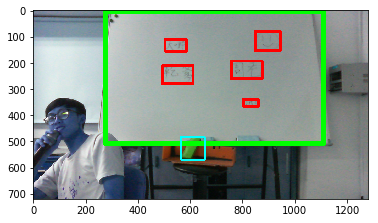

error: OpenCV(4.1.1) /home/pi/opencv-python/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


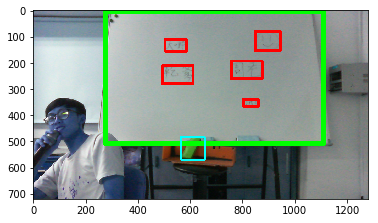

In [7]:
if vc.isOpened(): # try to get the first frame
    is_capturing, frame = vc.read()
    plt.imshow(frame)
    frame = cv2.cvtColor(frame, cv2.cv2.COLOR_BGR2RGB)
    webcam_preview = plt.imshow(frame)
    HSVframe =cv2.cvtColor(frame, cv2.COLOR_BGR2HSV) #HSV

else:
    is_capturing = False

while is_capturing:
    try:   # Lookout for a keyboardInterrupt to stop the script
        is_capturing, frame = vc.read()
        HSVframe =cv2.cvtColor(frame, cv2.COLOR_BGR2HSV) #HSV

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)    # makes the blues image look real colored
        blurred = cv2.GaussianBlur(gray, (5, 5), 0) 
        canny = cv2.Canny(blurred, 0, 20)
        
        #result = np.hstack([frame, canny])
        kernel = np.ones((1, 20), np.uint8) #設定卷積核 (高, 寬)
        dilation = cv2.dilate(canny,kernel,iterations = 1)

        dst = 255 - dilation #反白
        kernel = np.ones((50,50), np.uint8) 
        morph_o = cv2.morphologyEx(dst, cv2.MORPH_OPEN, kernel) #影象開運算-去除躁點

        #kernel = np.ones((1, 50), np.uint8) #設定卷積核 (高, 寬)
        #dilation = cv2.dilate(morph_o,kernel,iterations=1)
        contours, hierarchy = cv2.findContours(morph_o, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

        c = max(contours, key = cv2.contourArea)
        x,y,w,h = cv2.boundingRect(c)
        result=cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),20)
        
        
        closing = cv2.morphologyEx(canny,cv2.MORPH_CLOSE,kernel)
        contours, hierarchy = cv2.findContours(closing, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)# cv2.RETR_LIST檢測的輪廓不建立等级
        for i in contours:
            cnt=i
            ob_x,ob_y,ob_w,ob_h = cv2.boundingRect(cnt)
            if ob_x>x+50 and ob_x+ob_w < x+w-50 and ob_y>y+50 and ob_y+ob_h < y+h-50:
                cv2.rectangle(result,(ob_x,ob_y),(ob_x+ob_w,ob_y+ob_h),(255,0,0),10)
                
        colorLow = np.array([35,43,46]) #green(HSV)
        colorHigh = np.array([90,255,255]) #green(HSV)
        mask = cv2.inRange(HSVframe, colorLow, colorHigh)
        contours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
        for i in contours:#將每個框框大於50*50的標起來
            cnt=i
            x,y,w,h = cv2.boundingRect(cnt)
            if w>50 and h>50:
                cv2.rectangle(result,(x,y),(x+w,y+h),(0,255,255),5)
            

            
        
        #serial.write(bytes(("G"),'UTF-8'))

        print("111111")
        webcam_preview.set_data(result)
        plt.draw()        
        display.clear_output(wait=True)
        display.display(plt.gcf())
        
        
        
    except KeyboardInterrupt:
        vc.release()

In [ ]:
q